In [1]:
# Supressing all the warnings
import warnings
warnings.filterwarnings('ignore')

*** Python needs data locally for charts and visualization. It can not use the Spark dataframe fior these purposes. ***

In [2]:
# Importing the libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

os.chdir('Spark Data Analysis and Visualization')

In [3]:
user = pd.read_csv('user.txt', sep = '|', header = None)
user.columns = ['User ID', 'Age', 'Gender', 'Occupation', 'Zip Code']
user.head()

,User ID,Age,Gender,Occupation,Zip Code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


In [4]:
user.describe()

,User ID,Age
count,943.000000,943.000000
mean,472.000000,34.051962
std,272.364951,12.192740
min,1.000000,7.000000
25%,236.500000,25.000000
50%,472.000000,31.000000
75%,707.500000,43.000000
max,943.000000,73.000000


### Histogram
Visualization of frequency distribution

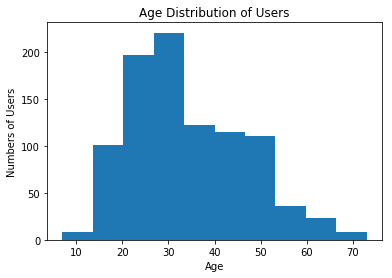

In [5]:
plt.hist(user['Age'])
plt.title('Age Distribution of Users')
plt.xlabel('Age')
plt.ylabel('Numbers of Users')
plt.show()

### Density Plot 

Similar to histogram. Plots probability density function for finite length of data. This plot shows if there is ontinuity in the data points, which Histogram does not.

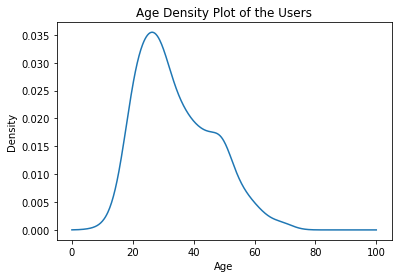

In [6]:
# Importing ther library for Density plot
from scipy.stats import gaussian_kde
density = gaussian_kde(user['Age'])
xs = np.linspace(0, 100, 500)
density.covariance_factor = lambda : 0.25
density._compute_covariance()
plt.plot(xs, density(xs))
plt.title('Age Density Plot of the Users')
plt.xlabel('Age')
plt.ylabel('Density')
plt.show()

*** Histogram of Age Distribution Vs Boxplot containing the summary of the distribution ***

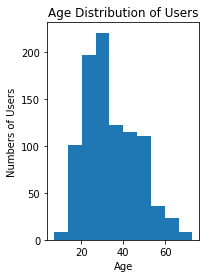

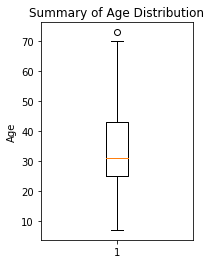

In [7]:
# First Plot in the left
plt.subplot(121)
plt.hist(user['Age'])
plt.title('Age Distribution of Users')
plt.xlabel('Age')
plt.ylabel('Numbers of Users')
plt.show()

# Plot in the right
plt.subplot(122)
plt.boxplot(user['Age'])
plt.title('Summary of Age Distribution')
plt.ylabel('Age')
plt.show()

### Bar Chart

In [8]:
# Top 10 occupation
top10occ = user.groupby('Occupation').agg({'User ID': 'count'}).sort(columns = 'User ID', ascending = False).head(10)
top10occ

,User ID
Occupation,
student,196
other,105
educator,95
administrator,79
engineer,67
programmer,66
librarian,51
writer,45
executive,32


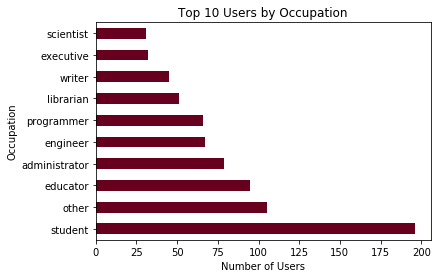

In [9]:
top10occ.plot(kind='barh', colormap='RdBu', legend = False)
plt.xlabel('Number of Users')
plt.title('Top 10 Users by Occupation')
plt.show()

In [10]:
# Stacked bar plot
genderData = user.groupby(['Occupation', 'Gender']).count()['User ID'].unstack(level = 1)
genderData = genderData.fillna(0)
genderData.head()

Gender,F,M
Occupation,,
administrator,36.0,43.0
artist,13.0,15.0
doctor,0.0,7.0
educator,26.0,69.0
engineer,2.0,65.0


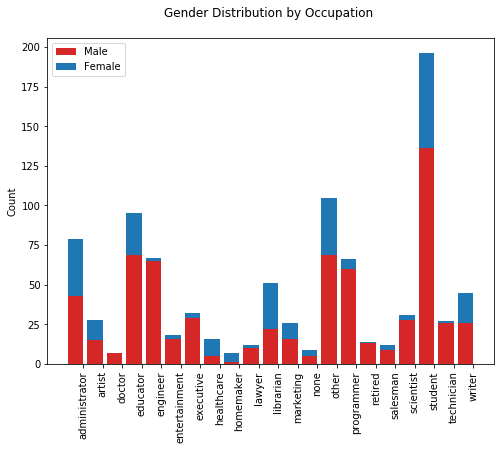

In [11]:
ind = np.arange(len(genderData['M']))
width = 0.8
occList = genderData.index
plt.figure(figsize=(8, 6))
plt.bar(ind, genderData['M'], width, color = '#d62728', align = 'center')
plt.bar(ind, genderData['F'], width, bottom = genderData['M'], align = 'center')
plt.ylabel('Count')
plt.title('Gender Distribution by Occupation \n')
plt.xticks(ind + width/2, occList, rotation = 90)
plt.legend(('Male', 'Female'), loc = 2)
plt.show()

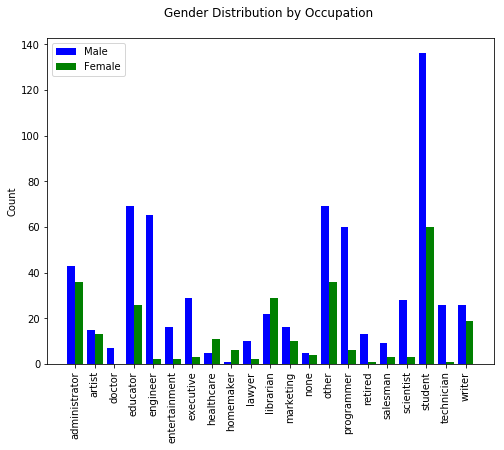

In [12]:
# Unstacked bar plot
ind = np.arange(len(genderData['M']))
width = 0.4
occList = genderData.index
plt.figure(figsize=(8, 6))
plt.bar(ind, genderData['M'], width, color = 'b', align = 'center')
plt.bar(ind + width, genderData['F'], width, color = 'g', align = 'center')
plt.ylabel('Count')
plt.title('Gender Distribution by Occupation \n')
plt.xticks(ind + width/2, occList, rotation = 90)
plt.legend(('Male', 'Female'), loc = 2)
plt.show()

### Pie Chart

In [13]:
top10occ

,User ID
Occupation,
student,196
other,105
educator,95
administrator,79
engineer,67
programmer,66
librarian,51
writer,45
executive,32


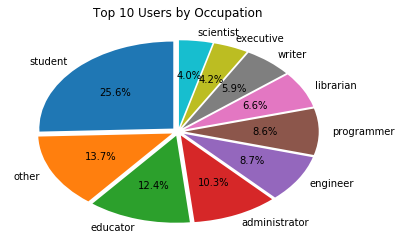

In [14]:
explode = [0.05]*len(top10occ)
plt.pie(top10occ, labels= top10occ.index, explode = explode, shadow = False, startangle = 90, autopct='%1.1f%%')
plt.title('Top 10 Users by Occupation')
plt.show()

In [15]:
# Top 6 zip
top6zip = user.groupby('Zip Code').agg({'User ID': 'count'}).sort(columns = 'User ID', ascending = False).head(6)
top6zip

,User ID
Zip Code,
55414,9
55105,6
20009,5
55337,5
10003,5
27514,4


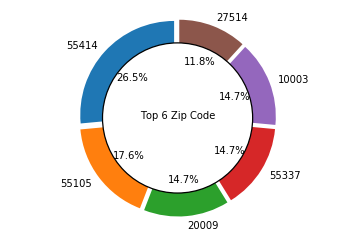

In [16]:
# Donut Chart

explode = [0.05]*len(top6zip)
#draw a circle at the center of pie to make it look like a donut
centre_circle = plt.Circle((0,0), radius = 0.8, color = 'black', fc = 'white', linewidth = 1.25)
plt.pie(top6zip, labels= top6zip.index, explode = explode, shadow = False, startangle = 90, autopct='%1.1f%%')
plt.gcf().gca().add_artist(centre_circle)
# The aspect ratio is to be made equal. This is to make sure that pie chart is coming perfectly as a circle.
plt.axis('equal')
plt.text(- 0.4, 0, 'Top 6 Zip Code', fontsize = 10)
plt.show()

### Boxplot

Boxplot is very useful to catch the summary statistics of data

In [17]:
user['Age'].describe()

count    943.000000
mean      34.051962
std       12.192740
min        7.000000
25%       25.000000
50%       31.000000
75%       43.000000
max       73.000000
Name: Age, dtype: float64

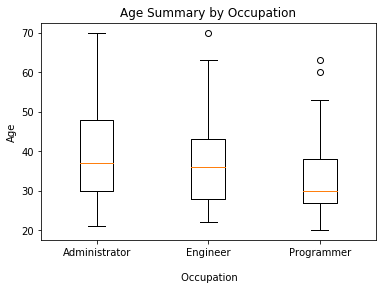

In [18]:
# Boxplot of Ages by Occupation

admin = user[user['Occupation'] == 'administrator']['Age']
eng = user[user['Occupation'] == 'engineer']['Age']
prog = user[user['Occupation'] == 'programmer']['Age']

boxPlot = [admin, eng, prog]
Labels = ['Administrator', 'Engineer', 'Programmer']
x = np.arange(len(boxPlot))
plt.figure()
plt.boxplot(boxPlot)
plt.title('Age Summary by Occupation')
plt.ylabel('Age')
plt.xlabel('\n Occupation')
plt.xticks(x + 1, Labels, rotation = 0)
plt.show()

The ++ symbols in the 'Programmer' occupation shows the outliers

In [19]:
# Let us read movie data for few more plots

movie = pd.read_csv('movies.csv')
movie.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


We need to split on '|' to process this data before jumping into further analysis

In [20]:
sparse_data = pd.concat([movie[['movieId', 'title']], movie.genres.str.get_dummies(sep='|')], axis=1)
sparse_data.head()

,movieId,title,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),0,0,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji (1995),0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
3,4,Waiting to Exhale (1995),0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
4,5,Father of the Bride Part II (1995),0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
sparse_data.drop(['movieId', 'title'], axis=1, inplace=True)

In [22]:
genre = sparse_data.sum().sort_values()
genre

IMAX                    196
(no genres listed)      246
Film-Noir               330
Western                 676
Animation              1027
Musical                1036
Children               1139
War                    1194
Fantasy                1412
Mystery                1514
Sci-Fi                 1743
Adventure              2329
Documentary            2471
Horror                 2611
Crime                  2939
Action                 3520
Romance                4127
Thriller               4178
Comedy                 8374
Drama                 13344
dtype: int64

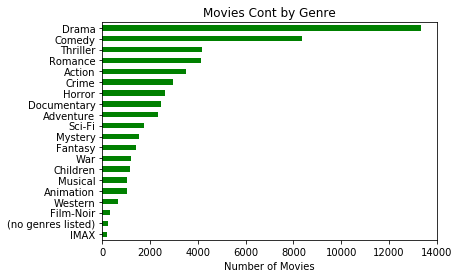

In [23]:
genre.plot(kind='barh', color='g', legend = False)
plt.xlabel('Number of Movies')
plt.title('Movies Cont by Genre')
plt.show()

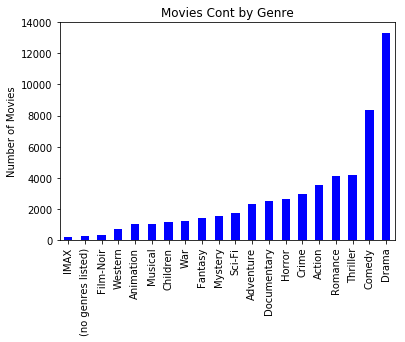

In [24]:
genre.plot(kind='bar', color='b', legend = False)
plt.ylabel('Number of Movies')
plt.title('Movies Cont by Genre')
plt.show()

### Scatter Plot

In [25]:
movie['Title'], movie['Year'] = movie['title'].str.rsplit(' ', 1).str
movie['Year'] = movie['Year'].str.strip('\(').str.strip('\)')
movie.head()

,movieId,title,genres,Title,Year
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,Toy Story,1995
1,2,Jumanji (1995),Adventure|Children|Fantasy,Jumanji,1995
2,3,Grumpier Old Men (1995),Comedy|Romance,Grumpier Old Men,1995
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,Waiting to Exhale,1995
4,5,Father of the Bride Part II (1995),Comedy,Father of the Bride Part II,1995


In [26]:
yearCount = movie.groupby('Year').agg({'movieId': 'count'})
yearDF = yearCount.sort_values(by = 'movieId', ascending = False).head(20)
yearDF

,movieId
Year,
2009,1105
2013,997
2012,997
2011,991
2008,971
2010,942
2007,894
2006,848
2014,737


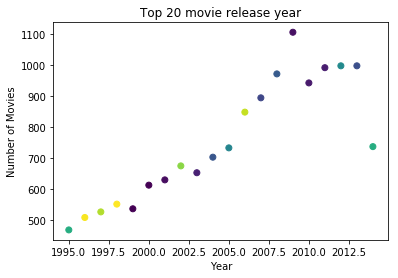

In [27]:
colors = np.random.rand(len(yearDF))
plt.scatter(yearDF.index, yearDF.values, c = colors)
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.title('Top 20 movie release year')
plt.show()

Instead of showing the circles with fixed radius value, let's draw the circle area proportioanl to the value. This will help us to visualize our data better.

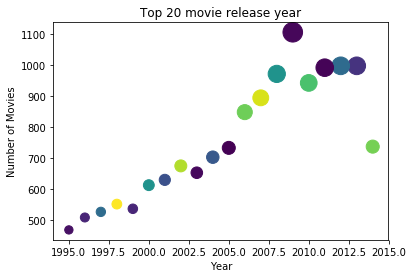

In [28]:
colors = np.random.rand(len(yearDF))
circleArea = np.pi * (yearDF.values/100)**2
plt.scatter(yearDF.index, yearDF.values, c = colors, s = circleArea)
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.title('Top 20 movie release year')
plt.show()